In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import kerasNN
import datacontrol
import validation
import itertools
from sklearn.model_selection import train_test_split
import time

Using TensorFlow backend.


In [2]:
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42, shuffle = True)


<h>First network- very big!(already tuned the eta)</h>

loss: 1.03
time: 435.412139


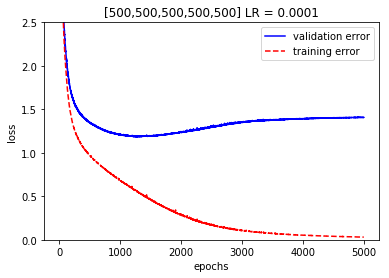

1.032862374663253

In [11]:
NN = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

Second Netowrk- smaller (already tuned the eta)

loss: 1.00
time: 304.826204


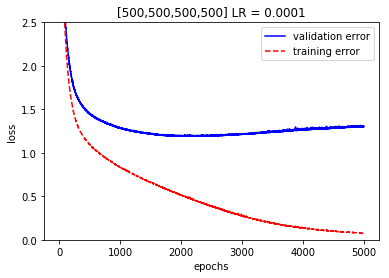

1.004419310437403

In [12]:
NN = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.03
time: 56.785615


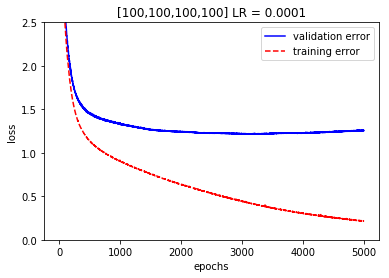

1.0274254656959132

In [13]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100, 100], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.05
time: 39.763056


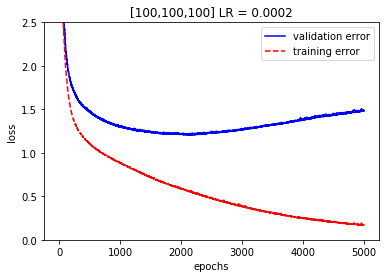

1.0517821533921312

In [19]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100], activation = "relu", eta = 0.0002, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.01
time: 34.997588


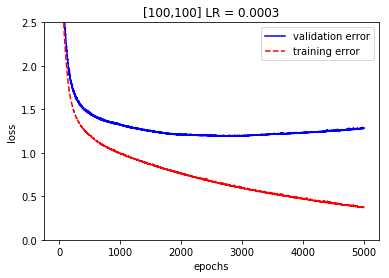

1.0058196672291897

In [21]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.03
time: 26.886306


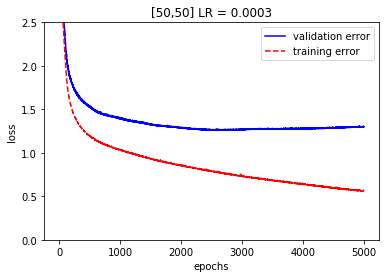

1.0274224725360792

In [24]:
NN = kerasNN.KerasNN(NetworArchitecture = [50, 50], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

Now we implement the cross validation: we have writtena funciton that implements it by himself.

In [12]:
SMALL = kerasNN.KerasNN(NetworArchitecture = [50, 50], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 2600)
MEDIUM = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100], activation = "relu", eta = 0.0002, momentum = 0.9, epochs = 1500)
BIG = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 1000)

we find out that the minimun is reached after 2600 epochs in average

In [9]:
start = time.time()
smallval, smalltrain = SMALL.trainCV(X, Y, plot=False)
smalltime = time.time()- start

kerasNN

Min loss on validation set was on epoch 1982
Min loss on validation set was on epoch 1937
Min loss on validation set was on epoch 2094
Min loss on validation set was on epoch 2599
Min loss on validation set was on epoch 1941

 Time: 68.55
1.04 (+/- 0.02)
0.90 (+/- 0.01)


we find out that the minimun is reached after 1500 epochs in average

In [17]:
start = time.time()
mediumval, mediumtrain = MEDIUM.trainCV(X, Y, plot=False)
mediumtime = time.time() - start

kerasNN

Min loss on validation set was on epoch 1446
Min loss on validation set was on epoch 1307
Min loss on validation set was on epoch 1477
Min loss on validation set was on epoch 1495
Min loss on validation set was on epoch 1023

 Time: 94.95
1.03 (+/- 0.02)
0.89 (+/- 0.01)


we find out that the minimun is reached after 1000 epochs in average

In [14]:
start = time.time()
bigval, bigtrain = BIG.trainCV(X, Y, plot=False)
bigtime = time.time() - start

kerasNN

Min loss on validation set was on epoch 987
Min loss on validation set was on epoch 959
Min loss on validation set was on epoch 861
Min loss on validation set was on epoch 995
Min loss on validation set was on epoch 982

 Time: 407.12
1.01 (+/- 0.02)
0.87 (+/- 0.01)


In [18]:
d = {"name": ["2L50", "3L100", "5L500"], 
     'validation Mean Error': [np.mean(smallval), np.mean(mediumval),np.mean(bigval)], 
     'validation std Error': [np.std(smallval), np.std(mediumval),np.std(bigval)], 
     'Training Mean Error':  [np.mean(smalltrain), np.mean(mediumtrain),np.mean(bigtrain)], 
     'Training std Error':  [np.std(smalltrain), np.std(mediumtrain),np.std(mediumtrain)], 
     "time": [smalltime/5, mediumtime/5, bigtime/5]
    }
df = pd.DataFrame(data=d)
df.to_csv("../result/NNCrossValidation.csv")
df.to_latex("../LatexTable/NNCrossValidation.txt")

In [24]:
df.to_csv("../result/NNCrossValidation.csv")

In [25]:
df.to_latex("../LatexTable/NNCrossValidation.txt")

We now train a network with dropout

loss: 0.96
time: 773.390537


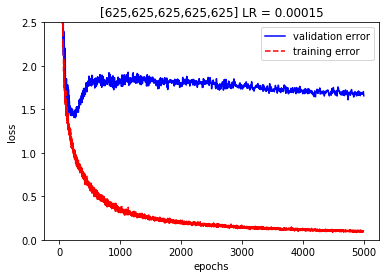

0.9598700859681648

In [15]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 5000, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 0.99
time: 63.692090


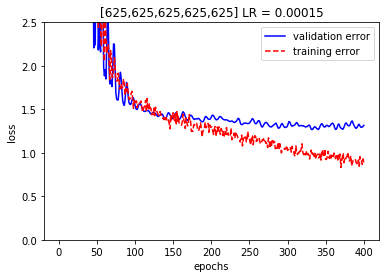

0.986136697525383

In [22]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 400, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.06
time: 30.266506


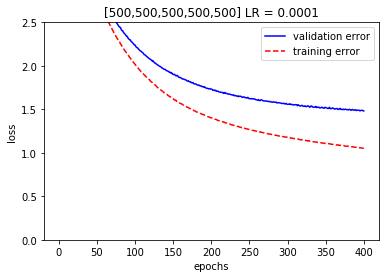

kerasNN

Min loss on validation set was on epoch 446
Min loss on validation set was on epoch 544
Min loss on validation set was on epoch 2714
Min loss on validation set was on epoch 317
Min loss on validation set was on epoch 908

 Time: 4090.17
0.92 (+/- 0.01)
0.47 (+/- 0.01)


In [27]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 5000, DropOutHiddenLayer = 0.2)
valdd, traindd = NNDropOut.trainCV(X, Y, plot=False)
timedd = time.time() - start

In [29]:
d = {"name": ["5L500+Dropout(0.8)"], 
     'validation Mean Error': [np.mean(valdd)], 
     'validation std Error': [np.std(valdd)], 
     'Training Mean Error':  [np.mean(traindd)], 
     'Training std Error':  [np.std(traindd)], 
     "time": [timedd/5]
    }
df = pd.DataFrame(data=d)
df.to_csv("../result/NNCrossValidationDropOut.csv")
df.to_latex("../LatexTable/NNCrossValidationDropOut.txt")

loss: 0.94
time: 1631.579569


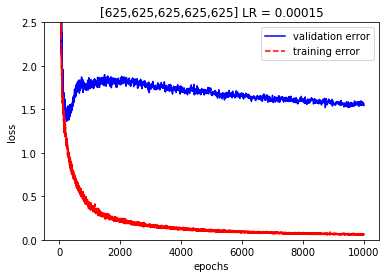

0.9411691622857817

In [30]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 10000, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

In [31]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 400, DropOutHiddenLayer = 0.2)
valdd, traindd = NNDropOut.trainCV(X, Y, plot=False)
timedd = time.time() - start

kerasNN

Min loss on validation set was on epoch 283
Min loss on validation set was on epoch 261
Min loss on validation set was on epoch 294
Min loss on validation set was on epoch 332
Min loss on validation set was on epoch 396

 Time: 331.55
0.99 (+/- 0.04)
0.88 (+/- 0.04)


In [ ]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 10000, DropOutHiddenLayer = 0.2)
valdd, traindd = NNDropOut.trainCV(X, Y, plot=False)
timedd = time.time() - start

kerasNN

